# Processo de modelagem com Machine Learning 

<img src = 'https://frnsys.com/assets/hosny/disparity.gif' width =600>


Neste notebook vamos apresentar conceitos e códigos referentes a um processo de modelagem do inicio ao fim, testando o modelo desenvolvido. 

Ainda que simples serve como uma referência para modelagens futuras.

O processo mais adequado e completo será apresentado durante as aulas e trata-se do CRISP-DM


## Processo básico de modelagem

É composto por 5 passos:

* Fazer a pergunta certa
* Preparar os dados
* Selecionar o algoritmo
* Treinar o modelo
* Testar o modelo

### Preparando os dados


Antes de iniciar a preparação dos dados necessitamos importar um conjunto de bibliotecas referente a criação de estruturas de dados, entendimento numérico dos tipos de dados além de bibliotecas gráficas.


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

Agora vamos carregar uma base de dados sobre consumo de cerveja e analisar o quanto o clima impacta nisto

<img src = 'https://media.giphy.com/media/42dsvcMDP3diU/giphy.gif' width=500>

In [4]:
# The code was removed by Watson Studio for sharing.

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,42005.0,27.30,23.9,32.5,0.0,False,25461.0
1,42006.0,27.02,24.5,33.5,0.0,False,28972.0
2,42007.0,24.82,22.4,29.9,0.0,True,30814.0
3,42008.0,23.98,21.5,28.6,1.2,True,29799.0
4,42009.0,23.82,21.0,28.3,0.0,False,28900.0


In [5]:
df_beer.describe()

,data,temp_avg,temp_min,temp_max,precip,beer_consumption
count,365.000000,361.000000,363.000000,362.000000,365.000000,365.000000
mean,42187.000000,21.101385,17.396970,26.480663,5.196712,25401.367123
std,105.510663,3.546618,2.969405,4.758531,12.417844,4399.142703
min,42005.000000,0.000000,0.000000,0.000000,0.000000,14343.000000
25%,42096.000000,18.920000,15.200000,23.725000,0.000000,22008.000000
50%,42187.000000,21.360000,17.900000,26.900000,0.000000,24867.000000
75%,42278.000000,23.280000,19.550000,29.400000,3.200000,28631.000000
max,42369.000000,28.860000,24.500000,36.500000,94.800000,37937.000000


In [6]:
df_beer.count()

data                365
temp_avg            361
temp_min            363
temp_max            362
precip              365
weekend             363
beer_consumption    365
dtype: int64

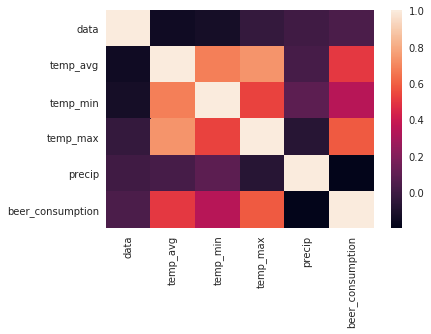

In [7]:
sns.heatmap(df_beer.corr())

In [8]:
df_beer.corr()

,data,temp_avg,temp_min,temp_max,precip,beer_consumption
data,1.000000,-0.144410,-0.127932,-0.029035,0.007490,0.043541
temp_avg,-0.144410,1.000000,0.678633,0.735339,0.026834,0.503227
temp_min,-0.127932,0.678633,1.000000,0.531704,0.094701,0.345033
temp_max,-0.029035,0.735339,0.531704,1.000000,-0.071084,0.587027
precip,0.007490,0.026834,0.094701,-0.071084,1.000000,-0.193784
beer_consumption,0.043541,0.503227,0.345033,0.587027,-0.193784,1.000000


Não foram encontrados colunas correlacionadas o suficiente para removê-las.

### Compreendendo relações e correlações de variáveis

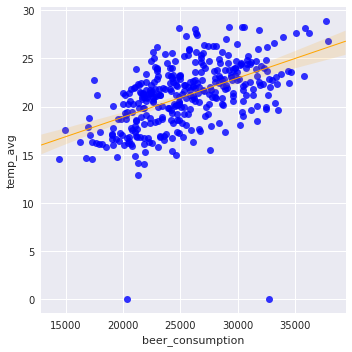

In [13]:
sns.lmplot("beer_consumption", "temp_avg", df_beer,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

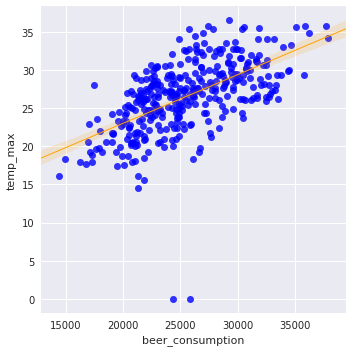

In [14]:
sns.lmplot("beer_consumption", "temp_max", df_beer,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

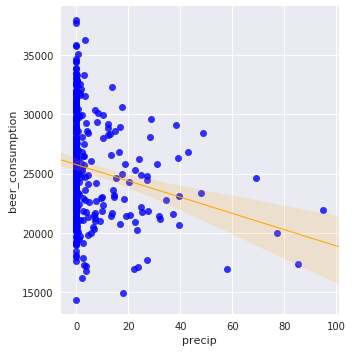

In [15]:
sns.lmplot("precip", "beer_consumption", df_beer,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

### Mapear dados em label para numéricos

In [16]:
class_weekend = {True: 1, False: 0}
df_beer["weekend"] = df_beer["weekend"].map(class_weekend)

In [17]:
df_beer.head(5)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,42005.0,27.30,23.9,32.5,0.0,0.0,25461.0
1,42006.0,27.02,24.5,33.5,0.0,0.0,28972.0
2,42007.0,24.82,22.4,29.9,0.0,1.0,30814.0
3,42008.0,23.98,21.5,28.6,1.2,1.0,29799.0
4,42009.0,23.82,21.0,28.3,0.0,0.0,28900.0


### Busca por dados nulos e inválidos

In [18]:
df_beer.isnull().any()

data                False
temp_avg             True
temp_min             True
temp_max             True
precip              False
weekend              True
beer_consumption    False
dtype: bool

In [19]:
df_beer[df_beer["temp_avg"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,42173.0,NaN,15.8,26.2,0.0,0.0,24534.0
181,42186.0,NaN,16.2,20.5,0.0,0.0,20824.0
309,42314.0,NaN,18.0,22.8,0.0,0.0,20575.0
314,42319.0,NaN,19.8,32.7,0.0,0.0,29569.0


In [20]:
df_beer[df_beer["temp_min"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
7,42012.0,24.90,NaN,32.8,48.6,0.0,28397.0
116,42121.0,19.82,NaN,24.9,0.0,0.0,21838.0


In [21]:
df_beer[df_beer["temp_max"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,42103.0,19.40,15.9,NaN,0.0,0.0,20298.0
165,42170.0,16.02,13.1,NaN,0.0,0.0,19119.0
237,42242.0,18.92,14.8,NaN,0.6,0.0,23357.0


In [22]:
df_beer[df_beer["weekend"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,42026.0,21.74,19.2,0.0,31.0,NaN,25795.0
27,42032.0,25.68,20.1,29.9,4.9,NaN,22603.0


Temperatura média pode ser calculada entre a temperatura máxima e mínima

In [23]:
df_beer_temp_avg_null = df_beer[df_beer["temp_avg"].isnull()].copy()
df_beer_temp_avg_null

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,42173.0,NaN,15.8,26.2,0.0,0.0,24534.0
181,42186.0,NaN,16.2,20.5,0.0,0.0,20824.0
309,42314.0,NaN,18.0,22.8,0.0,0.0,20575.0
314,42319.0,NaN,19.8,32.7,0.0,0.0,29569.0


In [24]:
df_beer_temp_avg_null["temp_avg"] = (df_beer["temp_max"] + df_beer["temp_min"])/2
df_beer_temp_avg_null

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,42173.0,21.00,15.8,26.2,0.0,0.0,24534.0
181,42186.0,18.35,16.2,20.5,0.0,0.0,20824.0
309,42314.0,20.40,18.0,22.8,0.0,0.0,20575.0
314,42319.0,26.25,19.8,32.7,0.0,0.0,29569.0


In [25]:
df_beer["temp_avg"] = df_beer["temp_avg"].replace(np.nan,(df_beer["temp_max"] + df_beer["temp_min"])/2)

In [26]:
df_beer.loc[[168,181,309,314]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,42173.0,21.00,15.8,26.2,0.0,0.0,24534.0
181,42186.0,18.35,16.2,20.5,0.0,0.0,20824.0
309,42314.0,20.40,18.0,22.8,0.0,0.0,20575.0
314,42319.0,26.25,19.8,32.7,0.0,0.0,29569.0


In [27]:
df_beer["temp_min"] = df_beer["temp_min"].replace(np.nan,df_beer["temp_min"].mean())

In [28]:
df_beer.loc[[7,116]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
7,42012.0,24.90,17.39697,32.8,48.6,0.0,28397.0
116,42121.0,19.82,17.39697,24.9,0.0,0.0,21838.0


In [29]:
df_beer["temp_max"] = df_beer["temp_max"].replace(np.nan,df_beer["temp_max"].mean())

In [30]:
df_beer.loc[[98, 165, 237]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,42103.0,19.40,15.9,26.480663,0.0,0.0,20298.0
165,42170.0,16.02,13.1,26.480663,0.0,0.0,19119.0
237,42242.0,18.92,14.8,26.480663,0.6,0.0,23357.0


In [31]:
df_beer["weekend"] = df_beer["weekend"].replace(np.nan,df_beer["weekend"].mode()[0])

In [32]:
df_beer.loc[[21,27]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,42026.0,21.74,19.2,0.0,31.0,0.0,25795.0
27,42032.0,25.68,20.1,29.9,4.9,0.0,22603.0


In [33]:
df_beer["weekend"].mode()[0]

0.0

In [34]:
df_beer.isnull().any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip              False
weekend             False
beer_consumption    False
dtype: bool

Verifcar ocorrência de números iguais a 0, que seria inválido

In [35]:
(df_beer == 0).any()

data                False
temp_avg             True
temp_min             True
temp_max             True
precip               True
weekend              True
beer_consumption    False
dtype: bool

In [36]:
df_beer[df_beer["temp_avg"] == 0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
323,42328.0,0.0,19.6,27.0,6.8,0.0,20332.0
339,42344.0,0.0,20.6,28.0,0.1,1.0,32780.0


In [37]:
df_beer[df_beer["temp_min"] == 0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
13,42018.0,25.96,0.0,34.0,1.6,0.0,31825.0


In [38]:
df_beer[df_beer["temp_max"] == 0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,42026.0,21.74,19.2,0.0,31.0,0.0,25795.0
113,42118.0,22.52,19.3,0.0,0.0,0.0,24388.0


In [39]:
df_beer[df_beer["precip"] == 0].head(10)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,42005.0,27.30,23.9,32.5,0.0,0.0,25461.0
1,42006.0,27.02,24.5,33.5,0.0,0.0,28972.0
2,42007.0,24.82,22.4,29.9,0.0,1.0,30814.0
4,42009.0,23.82,21.0,28.3,0.0,0.0,28900.0
6,42011.0,24.00,19.5,33.7,0.0,0.0,29732.0
9,42014.0,26.76,22.1,34.2,0.0,1.0,37937.0
11,42016.0,25.96,21.4,35.4,0.0,0.0,25743.0
16,42021.0,28.86,22.0,35.8,0.0,1.0,37690.0
17,42022.0,28.26,23.4,35.6,0.0,1.0,30524.0
20,42025.0,25.32,22.7,30.9,0.0,0.0,29130.0


In [40]:
df_beer[df_beer["weekend"] == 0].head(10)

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,42005.0,27.30,23.90000,32.5,0.0,0.0,25461.0
1,42006.0,27.02,24.50000,33.5,0.0,0.0,28972.0
4,42009.0,23.82,21.00000,28.3,0.0,0.0,28900.0
5,42010.0,23.78,20.10000,30.5,12.2,0.0,28218.0
6,42011.0,24.00,19.50000,33.7,0.0,0.0,29732.0
7,42012.0,24.90,17.39697,32.8,48.6,0.0,28397.0
8,42013.0,28.20,21.90000,34.0,4.4,0.0,24886.0
11,42016.0,25.96,21.40000,35.4,0.0,0.0,25743.0
12,42017.0,25.52,21.20000,34.8,0.8,0.0,26990.0
13,42018.0,25.96,0.00000,34.0,1.6,0.0,31825.0


Precipitação e Weekend podem ser igual a 0.

Utilizar mesma estratégia anterior para os demais atributos.

In [41]:
df_beer["temp_avg"] = df_beer["temp_avg"].replace(0,(df_beer["temp_max"] + df_beer["temp_min"])/2)
df_beer["temp_min"] = df_beer["temp_min"].replace(0,df_beer["temp_min"].mean())
df_beer["temp_max"] = df_beer["temp_max"].replace(0,df_beer["temp_max"].mean())

In [42]:
(df_beer == 0).any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip               True
weekend              True
beer_consumption    False
dtype: bool

### Seperando dados de treinamento e teste

In [43]:
from sklearn.model_selection import train_test_split

feature_col_names = ['temp_max', 'precip', 'weekend']
predicted_class_names = ['beer_consumption']

X = df_beer[feature_col_names].values
y = df_beer[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [44]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_beer.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_beer.index)) * 100))

69.86% in training set
30.14% in test set


In [45]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Testando valores par verificar a performance

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('R2 score: %.2f' % lr_model.score(X_test, y_test))

R2 score: 0.74
R2 score: 0.74


R2 score está na faixa esperada de >= 70%

Simulação de um caso onde se espera maior consumo, clima quente, 35 graus C, sem chuva e no final de semana.

In [47]:
predict_value = [[35, 0, 1]]
lr_model.predict(predict_value)

array([ 35092.25246658])

Simulação de um caso onde se espera um consumo menor que o de cima, clima quente, 35 graus C, sem chuva mas em dia de semana.

In [48]:
predict_value = [[35, 0, 0]]
lr_model.predict(predict_value)

array([ 29753.3647769])

Simulação de um caso onde se espera um consumo menor que o de cima, clima quente, 35 graus C, com chuva e em dia de semana.

In [49]:
predict_value = [[35, 20, 0]]
lr_model.predict(predict_value)

array([ 28689.99450697])

Pior cenário, baixo consumo, frio (10 graus C), chovendo e em dia de semana.

In [50]:
predict_value = [[10, 20, 0]]
lr_model.predict(predict_value)

array([ 12008.88877202])

### Salvando modelo

Por Claudio Pinheiro 
https://www.linkedin.com/in/claudio-pinheiro-cloud/